> # 7 합성곱 신경망(CNN)

- 이미지 인식과 음성 인식 등 다양하 곳에 사용

## 7.1 전체 구조

- CNN도 기존 신경망 처럼 계층을 조합하여 만들 수 있음
- 합성곱 계층, 풀링 계층
- 기존의 완전연결 모형을 Affine 계층이라고 하자.

#### 기존 완전연결 계층(Affine 계층)

- (Affine - ReLU) $\rightarrow$ (Affine - ReLU) $\rightarrow$ (Affine - ReLU) ...
- 출력에서는 $\rightarrow$ (Affine - Softmax)

#### CNN으로 이뤄진 네트워크

- (Conv - ReLU - Pooling) $\rightarrow$ (Conv - ReLU - Pooling) $\rightarrow$ (Conv - ReLU - Pooling) $\rightarrow$ ...
- 출력에서는 마찬가지로 $\rightarrow$ (Affine - Softmax)
- 출력층에 가까워질 때 (Affine - ReLU) 조합 사용할 수 있음

## 7.2 합성곱 계층

- 패딩, 스트라이드
- 각 계층 사이에 3차원 데이터같이 입체적인 데이터가 흐름

### 7.2.1 완전연결 계층의 문제점

- 데이터의 형상이 무시됨
- 고차원 데이터를 1차원 데이터로 평탄화 하여 입력

#### CNN에서의 입출력 데이터

- 특징 맵(feature map)
- 합성곱 계층의 입력 데이터를 입력 특징 맵
- 합성곱 계층의 출력 데이터를 출력 특징 맵

### 7.2.2 합성곱 연산

- 이미지 처리에서의 필터 연산
- 문헌에 따라 필터를 커널이라고 칭하기도 함
- 윈도우를 일정 간격으로 이동해가며 입력 데이터를 적용
- 입력 데이터 - 필터 간 단일 곱셈 누산
- 마지막에 원소 각각 편향을 더해줌

### 7.2.3 패딩

- 합성곱 연산을 하기 전 데이터 주변을 특정 값으로 채우는 것
- 1로 지정하면 입력 데이터 사방을 폭이 1인 패딩 적용
- 주로 출력 크기를 조정할 목적으로 사용

### 7.2.4 스트라이드

- 필터를 적용하는 위치의 간격
- 스트라이드를 2로 하면 윈도우가 두 칸씩 이동
- 패딩, 스트라이드의 출력 크기에 대한 관계식
- 입력 크기(H, W), 필터 크기(FH, FW), 출력 크기(OH, OW), 패딩(P), 스트라이드(S)

## $OH = \frac{H + 2P - FH}{S} + 1$

## $OW = \frac{W + 2P - FW}{S} + 1$

- 각각이 정수로 나눠떨어지는 값이어야 함

### 7.2.5 3차원 데이터의 합성곱 연산

- 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행
- 그 결과를 더해서 하나의 출력을 얻음
- 입력 데이터의 채널 수와 필터의 채널 수가 같아야 함

### 7.2.6 블록으로 생각하기

- 3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움
- 출력으로 다수의 채널을 내보내려면? $\rightarrow$ 필터를 다수 사용
- 필터의 데이터는 4차원 (출력 채널 수, 입력 채널 수, 높이, 너비)

### 7.2.7 배치 처리

- 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장
- 데이터 수, 채널 수, 높이, 너비
- 데이터 수인 N회 분의 처리를 한 번에 수행

## 7.3 풀링 계층

- 가로 세로 방향의 공간을 줄이는 연산
- 최대 풀링은 대상 영역에서 최댓값을 구하는 방법
- 최대 풀링 외에도 평균 풀링 등이 있음

### 7.3.1 풀링 계층의 특징

- 학습해야 할 매개변수가 없다.
- 채널 수가 변하지 않는다.
- 입력의 변화에 영향을 적게 받는다.

## 7.4 합성곱/풀링 계층 구현하기

- 합성곱 계층과 풀링 계층은 복잡해 보이지만 쉽게 구현 가능

### 7.4.1 4차원 배열

#### 4차원 배열의 구현

In [1]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [2]:
print(x[0].shape, x[1].shape)

(1, 28, 28) (1, 28, 28)


In [3]:
print(x[0, 0], x[0][0])

[[6.26125783e-01 4.70805580e-01 7.53224950e-01 4.73589186e-01
  2.91437447e-01 4.99131276e-01 1.48162873e-01 5.78479466e-01
  6.39252092e-01 6.19743503e-01 7.62466771e-01 8.83860111e-02
  5.08882811e-01 6.04118762e-01 1.88185264e-01 8.45217142e-02
  6.56284497e-01 2.23980046e-02 3.41861079e-01 9.93254837e-01
  1.89648688e-01 1.44849694e-02 1.26326103e-01 1.53640951e-01
  7.99173051e-01 1.29600953e-02 7.02568713e-01 2.07243162e-01]
 [9.35485603e-02 4.91710615e-01 8.61973203e-01 1.11458392e-01
  3.43474019e-01 5.85688550e-01 5.90394394e-01 8.19133618e-01
  6.77971665e-01 7.13631730e-01 7.16369587e-01 6.06620403e-01
  2.10234725e-01 1.27324596e-01 5.01977416e-01 3.61072451e-01
  9.20708799e-01 1.30131362e-01 3.78440466e-02 3.91046989e-01
  4.25529518e-02 1.90511774e-01 2.49511463e-01 1.63208018e-01
  4.47395502e-01 8.75066323e-01 6.97665141e-01 1.78949647e-01]
 [3.06857270e-01 4.57959779e-02 4.60452453e-02 6.17488960e-01
  1.66837143e-01 6.42260406e-01 3.49112256e-02 5.93064657e-01
  5.15

### 7.4.2 im2col로 데이터 전개하기

- 'image to column'
- im2col은 데이터를 필터링(가중치 계산)하기 좋게 전개하는 함수
- 3차원 데이터에 해당 함수를 적용하면 2차원 행렬로 바뀜
- 필터의 적용 영역이 겹치면 전개한 후의 원소 수가 원래 원소 수보다 많아짐
- 메모리를 더 많이 소비하나 행렬 곱셈을 빠르게 진행할 수 있음
- 입력 $\rightarrow$ im2col로 전개한 행렬의 내적 $\rightarrow$ 출력데이터(2차원) $\rightarrow$ 출력 데이터 reshape

### 7.4.3 합성곱 계층 구현하기

- im2col(input_data, filter_h, filter_w, stride=1, pad=0)
- input_data: (데이터 수, 채널 수, 높이, 너비)의 4차원 배열의 입력 데이터
- filter_h: 필터의 높이
- filter_w: 필터의 너비
- stride: 스트라이드
- pad: 패딩

#### im2col의 실제 사용

In [4]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

In [5]:
x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


- 첫 번째 차원의 원소는 배치의 크기에 비례
- 모두 두 번째 차원의 원소는 75개(필터의 원소 수와 같다.)

#### 합성곱 계층 구현

In [6]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

- 합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화
- 필터는 (FN, C, FH, FW)의 4차원 형상
- transpose는 지정한 다차원 배열의 인덱스로 축 순서를 바꿔줌 .T와 같은 역할

#### 합성곱 계층의 역전파 주의사항

- im2col을 역으로 처리해야 함
- col2im 함수 사용 (common/util.py에 있음)

### 7.4.4 풀링 계층 구현하기

- 풀링 계층의 구현도 마찬가지로 im2col을 사용해 입력 데이터 전개
- 합성곱 계층과 다른 점은 채널 쪽이 독립적이라는 점

In [7]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis=1)
        
        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

- 입력 데이터 전개
- 행별 최댓값 구함
- 적절한 모양 성형
- 풀링 계층의 전체 구현은 common/layers.py

## 7.5 CNN 구현하기

- 단순한 CNN 네트워크 구성
- (Conv - ReLU - Pooling) $\rightarrow$ (Affine - ReLU) $\rightarrow$ (Affine - Softmax)

#### SimplConvNet에서 초기화 때 받는 인수

- input_dim: 입력 데이터의 차원
- conv_param: 합성곱 계층의 하이퍼파라미터(딕셔너리)
    - filter_num: 필터 수
    - filter_size: 필터 크기
    - stride: 스트라이드
    - pad: 패딩
    - hidden_size: 은닉층의 뉴런 수
    - output_size: 출력층의 뉴런 수
    - weight_init_std: 초기화 때의 가중치 표준편차

In [9]:
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28),
                conv_param={'filter_num':30, 'filter_size':5,
                           'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                            filter_stride + 1
        pull_output_size = int(filter_num * (conv_output_size / 2)) * \
                            (conv_output_size / 2)
        
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0],
                                           filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size,
                                           hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                          self.params['b1'],
                                          conv_param['stride'],
                                          conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                       self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                       self.params['b3'])
        
        self.last_layer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.revers()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads        

## 7.6 CNN 시각화하기

### 7.6.1 1번째 층의 가중치 시각화하기

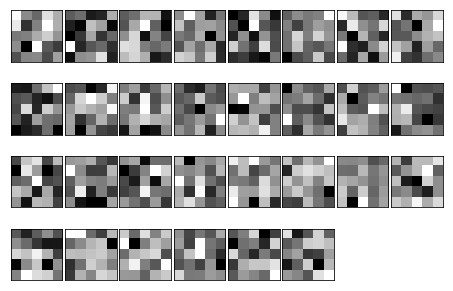

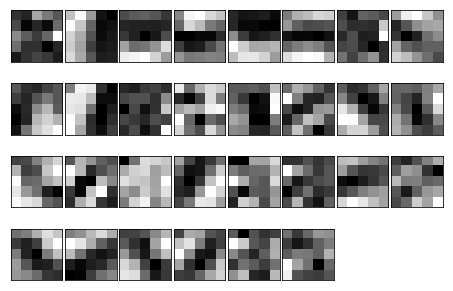

In [15]:
import sys, os
sys.path.append(os.pardir)
import simple_convnet
%run visualize_filter.py

- 1번째 층의 합성곱 계층에서는 저수준 정보가 추출
- 학습 후 필터는 점점 규칙성을 가진 이미지가 됨
- 예를들어 학습 후 필터중 두 번째는 세로 에지에 반응
- 세 번째 필터는 가로 에지에 반응

### 7.6.2 층 깊이에 따른 추출 정보 변화

- 1번째 층이 아닌 겹겹이 쌓인 CNN의 계층에서는 어떤 정보가 추출될까?
    - [8층 AlexNet의 예]
    - 1번째 층: 에지와 블롭
    - 3번째 층: 텍스처
    - 5번째 층: 사물의 일부
    - 마지막 완전연결 계층: 사물의 클래스
  
- 합성곱 계층을 여러 겹 쌓으면 층이 깊어지면서 더 복잡하고 추상화된 고급 정보가 추출

## 7.7 대표적인 CNN

### 7.7.1 LeNet

- CNN의 원조
- 손글씨 숫자를 인식하는 네트워크 (1998년 제안)
- 합성곱 계층과 풀링 계층을 반복하고 마지막에 완전연결 계층
- 현재의 CNN과는 몇 가지 차이점이 존재
    - 활성화 함수: 시그모이드 사용
    - 풀링 계층: 단순히 원소를 줄이기만 하는 서브샘플링 계층

### 7.7.2 AlexNet

- 딥러닝 열풍을 일으키는 데 큰 역할 (2012년 발표)
- 구성은 LeNet과 크게 다르지 않음
    - 활성화 함수로 ReLU 이용
    - LRN(Local Response Normalization)이라는 국소적 정규화 실시하는 계층 이용
    - 드롭아웃을 사용
- 환경과 컴퓨팅 파워의 발전으로 인해 성장

## 7.8 정리